### Importing the libraries

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
data = pd.read_csv('Churn.csv')

In [3]:
# viewing top 5 rows in the data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# viewing the columns
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# getting additional information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

In [6]:
# checking for missong values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- __The dataset contains no missing values.__
- __We have 7043 rows and 21 attributes(columns)__



In [7]:
# getting unique values
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
# checking for dtypes
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

__The datas that should be categorical are saved as numbers.__

In [9]:
# SeniorCitizen
data['SeniorCitizen'] = data.SeniorCitizen.astype('object')

### Done!

__The total charges data should be converted into numerical.__

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

data.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [11]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- __The conversion generated 11 null values in the total charges.__
- __Dropping the null values rows

In [12]:
#delete rows that includes the null values
data.dropna(inplace = True)

In [13]:
# checking the data
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

__There are no missing values. All are fixed__

We can drop the customer id since it is not required.


In [14]:
data = data.drop(['customerID'], axis=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


####  Numerical data

The continuous data:
- tenure: Period in months that customers stay in the company
- MonthlyCharge: Value of the monthly payment paid by the customer
- TotalCharges: Total amount paid by the customer
    
The discrete data:
- Senior Citizen

#### Categorical Data

- gender
- partner
- dependents
- Phone service
- MultipleLines
- InternetService
- Online Security
- OnlineBackup
- device Protection
- Tech support
- streaming tv
- streaming movies
- contract
- paperless billing
- payment method


### Statistical summary of the numerical variables

In [15]:
corr = data.corr()
corr.style.background_gradient()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


In [16]:
data.describe().round()

,tenure,MonthlyCharges,TotalCharges
count,7032.0,7032.0,7032.0
mean,32.0,65.0,2283.0
std,25.0,30.0,2267.0
min,1.0,18.0,19.0
25%,9.0,36.0,401.0
50%,29.0,70.0,1397.0
75%,55.0,90.0,3795.0
max,72.0,119.0,8685.0


In [17]:
# converting the column names to lower case
data.columns = data.columns.str.lower()

In [18]:
# viewing the column names
data.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### Data Visualization

#### Finding out the relationship between numerical values

Text(0.5, 1.0, 'Relationship between tenure and totalcharges')

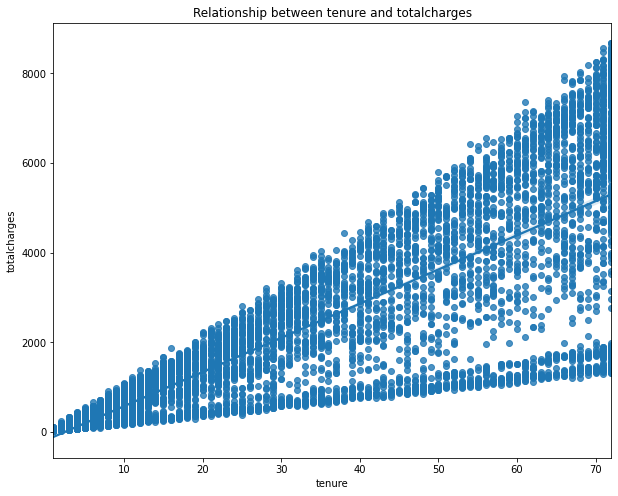

In [19]:
numerical_variables = data[['tenure', 'monthlycharges', 'totalcharges', 'churn']]
plt.figure(figsize= (10,8))
sns.regplot(x='tenure', y='totalcharges',data=numerical_variables)
plt.title('Relationship between tenure and totalcharges')

Text(0.5, 1.0, 'Relationship between monthly charges and total charges')

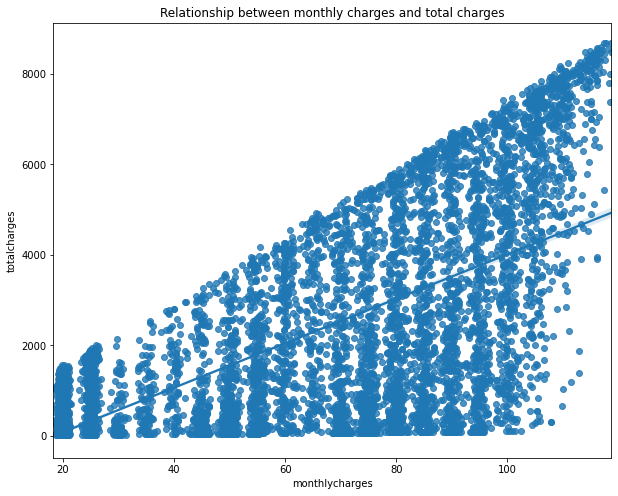

In [20]:
plt.figure(figsize= (10,8))
sns.regplot(x='monthlycharges', y='totalcharges',data=numerical_variables)
plt.title('Relationship between monthly charges and total charges')

<Figure size 1080x720 with 0 Axes>

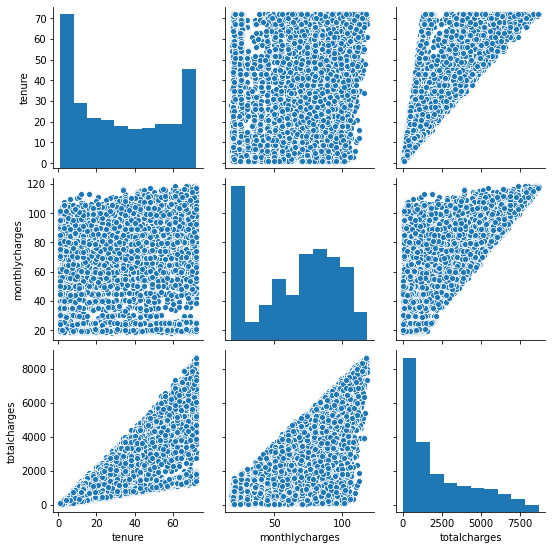

In [21]:
# pairplot
plt.figure(figsize=(15,10))
sns.pairplot(numerical_variables)

Text(0.5, 1.0, 'Relationship between tenure and total charges ')

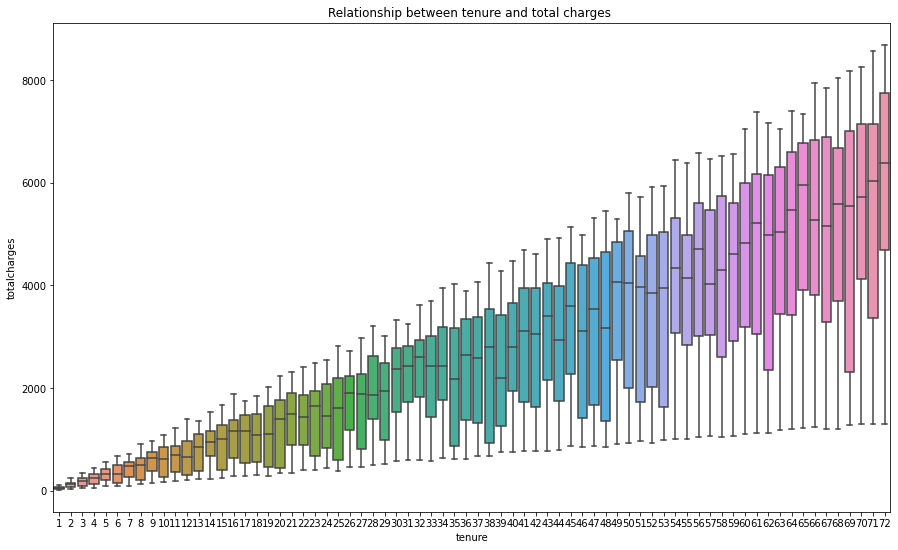

In [22]:
plt.figure(figsize=(15,9))
sns.boxplot(x='tenure',y='totalcharges',data=data)
plt.title('Relationship between tenure and total charges ')

#### The Boxplot clearly indicates that there are no outliers present in the data.

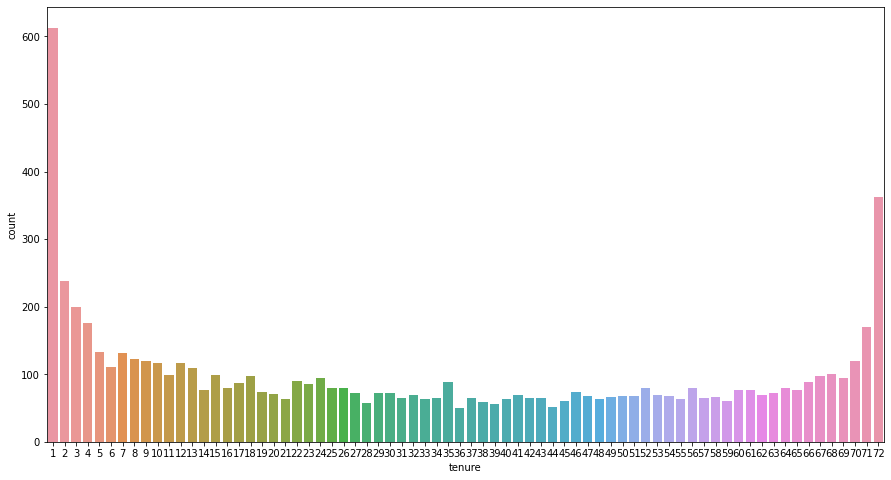

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(data['tenure'])

### Exploration of Categorical variables

Our target variable is __'Churn'__. This variable indicates whether the customer has left the company or not.

In [24]:
data.describe(include='object')

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


#### analyzing the senior citizen

In [25]:
pd.crosstab(data.churn, data.seniorcitizen, margins=True)

seniorcitizen,0,1,All
churn,,,
No,4497,666,5163
Yes,1393,476,1869
All,5890,1142,7032


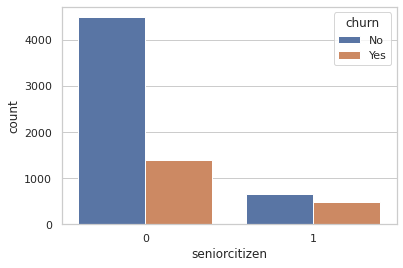

In [26]:
# plotting the chart for senior citizen
plt.figure(figsize=(6,4))
sns.set(style='whitegrid')
sns.countplot(data.seniorcitizen, hue=data.churn)

In [27]:
# analysing monthly charges vs senior citizen
sen_citizen = data[data['seniorcitizen'] == 1]
sen_citizen = sen_citizen.monthlycharges.mean()
print('Averaage monthly charges for elderly is {}'.format(sen_citizen))

Averaage monthly charges for elderly is 79.82035901926453


In [28]:
sen_citizen1 = data[data['seniorcitizen'] == 0]
sen_citizen1 = sen_citizen1.monthlycharges.mean()
print('Average monthly charges for non-elderly is {}'.format(sen_citizen1))

Average monthly charges for non-elderly is 61.88559422750423


In [29]:
senior_citizen = data.groupby('seniorcitizen').mean()
senior_citizen.round()

,tenure,monthlycharges,totalcharges
seniorcitizen,,,
0,32.0,62.0,2181.0
1,33.0,80.0,2810.0


Text(0.5, 1.0, 'Total Revenue by Elderly and Non-Elderly')

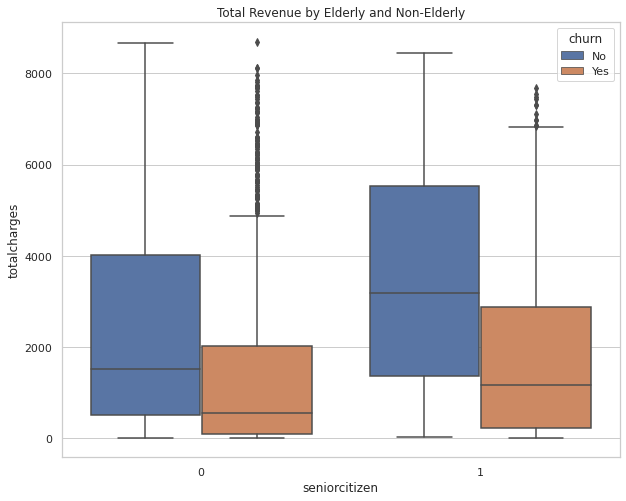

In [30]:
plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
sns.boxplot(x=data.seniorcitizen, y=data.totalcharges, hue=data.churn)
plt.title('Total Revenue by Elderly and Non-Elderly')

In [31]:
data.seniorcitizen.value_counts(normalize=True)

0    0.8376
1    0.1624
Name: seniorcitizen, dtype: float64

#### visualizing the categorical variables with bar chart

In [32]:
# taking only the categorical variables
categorical_variables = list(data)

# removing the numerical variables
categorical_variables.remove('seniorcitizen')
categorical_variables.remove('tenure')
categorical_variables.remove('monthlycharges')
categorical_variables.remove('totalcharges')

# creating column into 4*4 matrix
cat_variables = np.array(categorical_variables)

# reshaping the columns into 4*4 mtrix
cat_variables = np.reshape(cat_variables, (4,4))

Bar Plot of each categorical variables


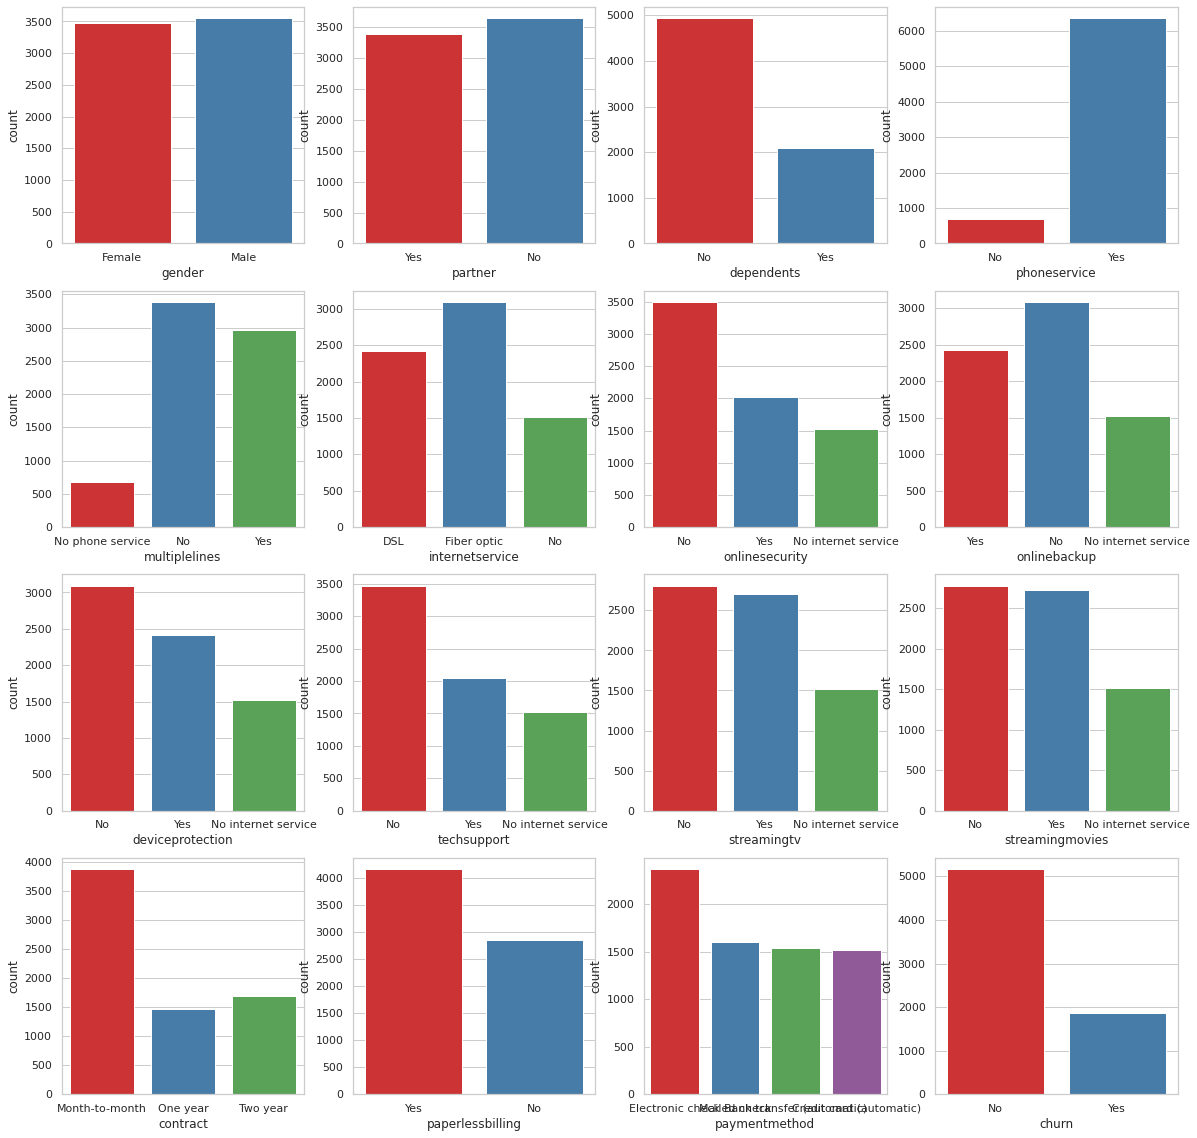

In [33]:
# plotting the bar chart
rows = 4; columns = 4
fig, axes = plt.subplots(rows, columns, figsize=(20,20))
print('Bar Plot of each categorical variables')

for row in range(rows):
    for column in range(columns):
        sns.countplot(data[cat_variables[row][column]], palette='Set1', ax=axes[row, column])

#### Analysing gender variable

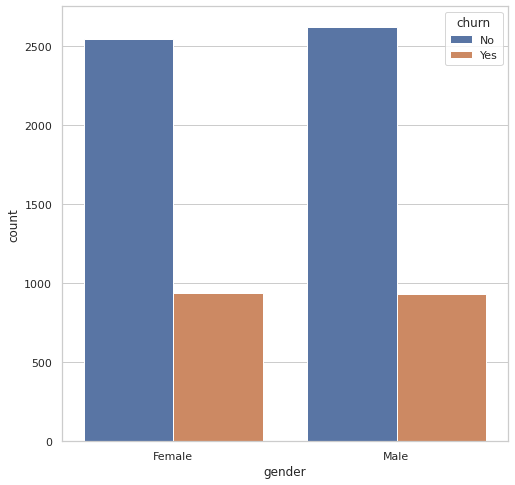

In [34]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(data.gender, hue = data.churn)

In [35]:
data.groupby(by = 'gender')['tenure'].mean().round()

gender
Female    32.0
Male      33.0
Name: tenure, dtype: float64

There is no difference between women and men

#### Analysing partner variable

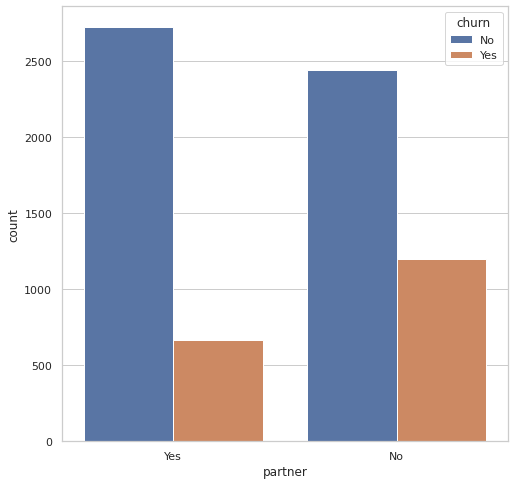

In [36]:
plt.figure(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.countplot(data.partner, hue = data.churn)

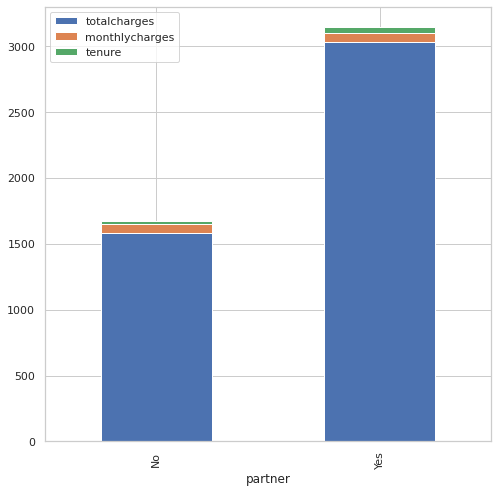

In [37]:
data.groupby('partner')['totalcharges', 'monthlycharges', 'tenure'].mean().plot(kind = 'bar', stacked = True, figsize = (8,8))

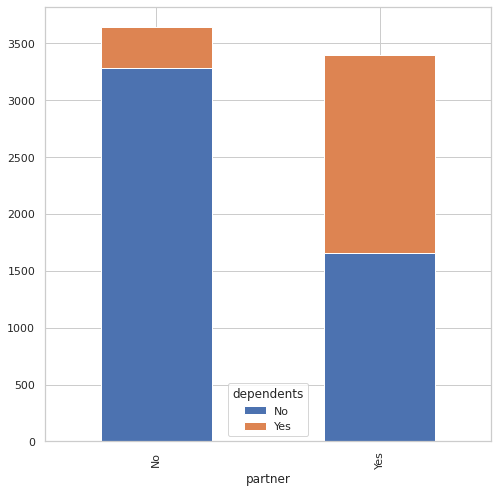

In [38]:
pd.crosstab(data.partner, data.dependents).plot(kind = 'bar', stacked = True, figsize = (8,8))

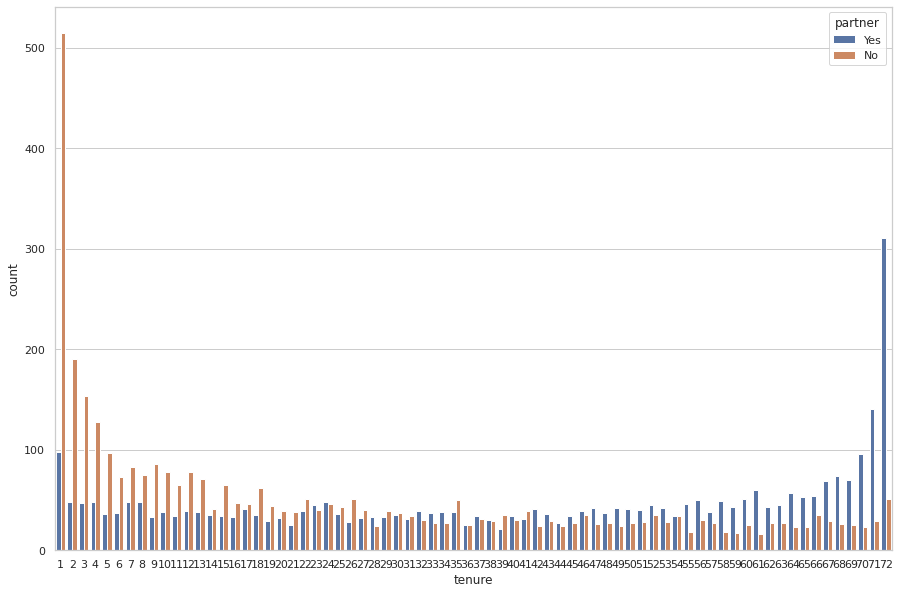

In [39]:
plt.figure(figsize = (15,10))
sns.countplot(data['tenure'], hue = data.partner)

#### The chart confirms that people who has partner stay more time in the company

In [40]:
pd.crosstab(data.internetservice, data.phoneservice, margins = True)

phoneservice,No,Yes,All
internetservice,,,
DSL,680,1736,2416
Fiber optic,0,3096,3096
No,0,1520,1520
All,680,6352,7032


#### The above table clearly indicates that the Fibre Optics is available only for those who has phone services. 

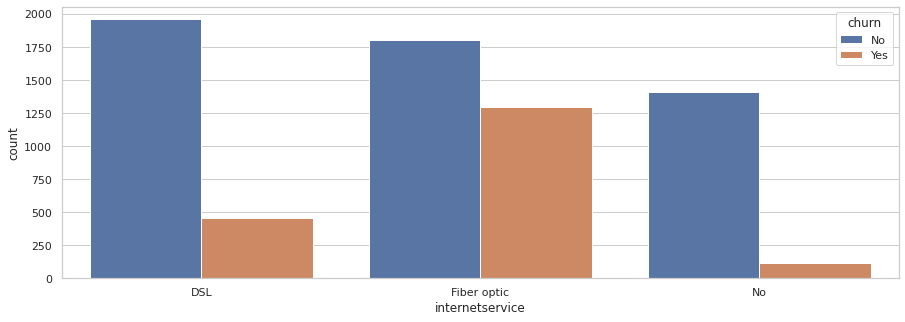

In [41]:
plt.figure(figsize = (15,5))
sns.countplot(data.internetservice, hue = data.churn)

In [42]:
data.groupby('internetservice')['totalcharges'].mean()

internetservice
DSL            2119.789259
Fiber optic    3205.304570
No              665.220329
Name: totalcharges, dtype: float64

## Creating the model

#### Transforming the data so that model can understand the data

Since gender does not have any difference, it can be dropped.

In [43]:
data.drop(['gender'],axis=1, inplace=True)

In [44]:
data.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
columns_to_convert = ['partner','dependents','phoneservice','onlinesecurity','onlinebackup',
                     'deviceprotection','techsupport','streamingtv','streamingmovies','paperlessbilling','churn']

In [46]:
for item in columns_to_convert:
    data[item].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
    
data.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [47]:
# adjusting the column Multiple Lines

data.multiplelines = data.multiplelines.replace(to_replace= 'No phone service', value = 'No')
data.multiplelines = data.multiplelines.replace(to_replace= ['Yes', 'No'], value = [1,0])
data.multiplelines.value_counts()

0    4065
1    2967
Name: multiplelines, dtype: int64

In [48]:
data.onlinesecurity = data.onlinesecurity.replace(to_replace= 'No internet service', value = 0)
data.onlinebackup = data.onlinebackup.replace(to_replace= 'No internet service', value = 0)
data.deviceprotection = data.deviceprotection.replace(to_replace= 'No internet service', value = 0)
data.techsupport = data.techsupport.replace(to_replace= 'No internet service', value = 0)
data.streamingtv = data.streamingtv.replace(to_replace= 'No internet service', value = 0)
data.streamingmovies = data.streamingmovies.replace(to_replace= 'No internet service', value = 0)

In [49]:
data1 = pd.get_dummies(data, columns = ['internetservice', 'contract', 'paymentmethod'], drop_first = True)
data1.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,monthlycharges,totalcharges,churn,internetservice_Fiber optic,internetservice_No,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


### Importing the libraries for model


In [50]:
from sklearn.model_selection import train_test_split

X = data1.drop(['churn'],axis=1) # feature variable
y = data1['churn'] # target variable

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [52]:
from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


In [53]:
# Creating function for Confusion Matrix , Precsion, Recall and F1 Score

def plot_confusion_matrix(classifier, y_test, y_pred_test):
    cm = confusion_matrix(y_test, y_pred_test)
    
    print("\n",classifier,"\n")
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    
    classNames = ['Churn-No','Churn-Yes']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))
    return

In [54]:
def plot_prec_rec_curve(classifier, y_test, y_pred_score):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_score)
    average_precision = average_precision_score(y_test, y_pred_score)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()



 LogisticRegression 



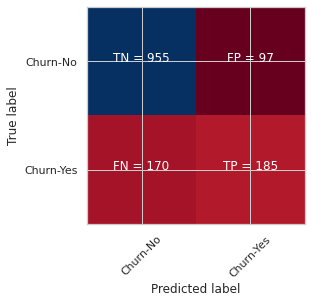

Recall=0.521 
Precision=0.656
F1=0.581
Average precision-recall score: 0.640


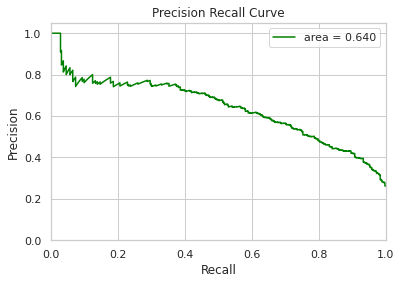


 DecisionTreeClassifier 



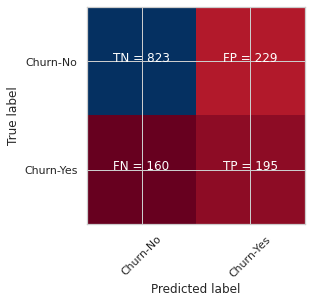

Recall=0.549 
Precision=0.460
F1=0.501
Average precision-recall score: 0.368


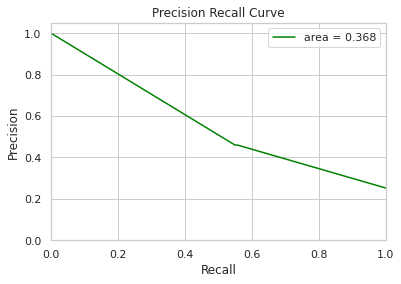


 RandomForestClassifier 



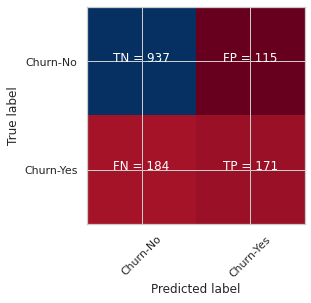

Recall=0.482 
Precision=0.598
F1=0.534
Average precision-recall score: 0.592


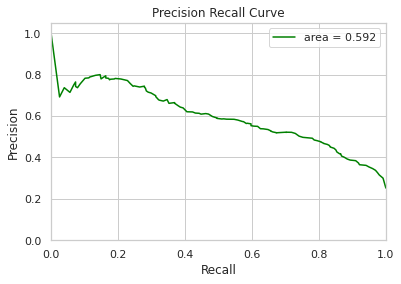


 AdaBoostClassifier 



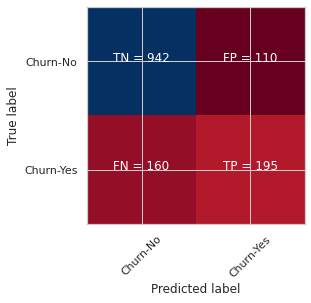

Recall=0.549 
Precision=0.639
F1=0.591
Average precision-recall score: 0.630


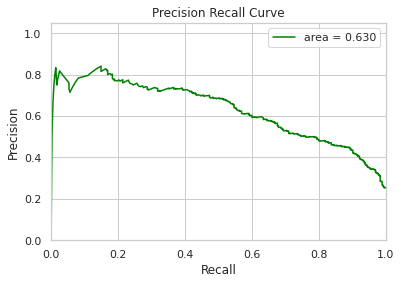

In [55]:
classifier_model = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(), AdaBoostClassifier()]

# Creating empty list to store the performance details
classifier_model_list= []
classifier_accuracy_test = []
classifier_accuracy_train = []
f1score = []
precisionscore = []
recallscore = []
avg_pre_rec_score = []
cv_score = []

for classifier_list in classifier_model:
    classifier = classifier_list
 
    # Fitting the training set into classification model
    classifier.fit(X_train,y_train)
    
    # Predicting the output on test datset
    y_pred_test = classifier.predict(X_test)    
    score_test = accuracy_score(y_test, y_pred_test)
    
     # Predicting the output on training datset
    y_pred_train = classifier.predict(X_train) 
    score_train = accuracy_score(y_train, y_pred_train)
    
    # Cross Validation Score on training test
    scores = cross_val_score(classifier, X_train,y_train, cv=10)
    cv_score.append(scores.mean())
    
    #Keeping the model and accuracy score into a list
    classifier_model_list.append(classifier_list.__class__.__name__)
    classifier_accuracy_test.append(round(score_test,4))
    classifier_accuracy_train.append(round(score_train,4))
    
    #Precision, Recall and F1 score
    f1score.append(f1_score(y_test, y_pred_test))
    precisionscore.append(precision_score(y_test, y_pred_test))
    recallscore.append(recall_score(y_test, y_pred_test))
    
    #Calculating Average Precision Recall Score
    try:
        y_pred_score = classifier.decision_function(X_test)
    except:
        y_pred_score = classifier.predict_proba(X_test)[:,1]
    
    from sklearn.metrics import average_precision_score
    average_precision = average_precision_score(y_test, y_pred_score)
    avg_pre_rec_score.append(average_precision)
    
    
    #Confusion Matrix
    plot_confusion_matrix(classifier_list.__class__.__name__, y_test, y_pred_test)
    plot_prec_rec_curve(classifier_list.__class__.__name__, y_test, y_pred_score)


In [56]:
#Creating pandas dataframe with Model and corresponding accuracy
accuracy_df = pd.DataFrame({'Model':classifier_model_list , 'Cross Val Score':cv_score, 'Test Accuracy' :classifier_accuracy_train , 'Precision':precisionscore, 'Recall':recallscore ,'Avg Precision Recall':avg_pre_rec_score ,'F1 Score':f1score})

# Calculating Average Accuracy = (Test + Train)/2
accuracy_df['Average_Accuracy'] =  (accuracy_df['Cross Val Score'] + accuracy_df['Test Accuracy'] )/ 2

#Arranging the Columns
print("\n  CLASSIFICATION MODEL PERFORMANCE EVALUATION\n")
accuracy_df = accuracy_df[['Model','Cross Val Score', 'Test Accuracy', 'Average_Accuracy','Precision', 'Recall','Avg Precision Recall','F1 Score']]  # This will arrange the columns in the order we want

#Sorting the Columns based on Average Accuracy
accuracy_df.sort_values('Average_Accuracy', axis=0, ascending=False, inplace=True) # Sorting the data with highest accuracy in the top
accuracy_df


  CLASSIFICATION MODEL PERFORMANCE EVALUATION



,Model,Cross Val Score,Test Accuracy,Average_Accuracy,Precision,Recall,Avg Precision Recall,F1 Score
2,RandomForestClassifier,0.788084,0.9979,0.892992,0.597902,0.481690,0.591834,0.533541
1,DecisionTreeClassifier,0.730489,0.9979,0.864195,0.459906,0.549296,0.368093,0.500642
3,AdaBoostClassifier,0.801422,0.8048,0.803111,0.639344,0.549296,0.629990,0.590909
0,LogisticRegression,0.799292,0.8016,0.800446,0.656028,0.521127,0.640174,0.580848


## Model evaluation

#### using gridsearch for logistic regression classifier

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, accuracy_score

In [58]:
def evaluation(clf, parameters):
    # Make an fbeta_score scoring object
    scorer = make_scorer(fbeta_score,beta=0.5)

    # Perform grid search on the classifier using 'scorer' as the scoring method
    grid_obj = GridSearchCV(clf, parameters,scorer)

    # Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train,y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

    # Report the before-and-afterscores
    print ("Unoptimized model\n")
    print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
    print ("\nOptimized Model\n")
    print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
    print (best_clf)

In [59]:
# for logistic regression classifier
evaluation(clf=LogisticRegression(), 
           parameters = {'C':np.logspace(0, 4, 10), 
                         'penalty' : ['l1', 'l2']
                        })

Unoptimized model

Accuracy score on testing data: 0.8102
F-score on testing data: 0.6237

Optimized Model

Final accuracy score on the testing data: 0.8081
Final F-score on the testing data: 0.6188
LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [60]:
# for adaboost classifier
evaluation(clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), 
                                 parameters= {'n_estimators': [50, 120],
                                             'learning_rate': [0.1, 0.5, 1.],
                                             'base_estimator__min_samples_split': np.arange(2,8,2),
                                             'base_estimator__max_depth': np.arange(1,4,1)})

Unoptimized model

Accuracy score on testing data: 0.7633
F-score on testing data: 0.5131

Optimized Model

Final accuracy score on the testing data: 0.8159
Final F-score on the testing data: 0.6372
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_sp